# Project 4 - Group 14

### Setup

In [1]:
#imported libraries go here
import pandas as pd
import seaborn
from collections import Counter
import numpy
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import re

### Preprocessing

In [2]:


def corpus_size(lines):
    custom_tokenizer(lines)
    print('____Corpus size____\n\nWords : ',tokens,'\nCharacters: ',characters,'\nVocabulary size: ',len(based))    

with open('../Data/Emotion/train_text.txt',"r", encoding="utf8") as file:
    lines = file.readlines()
# lines = open("").readlines()
def custom_tokenizer(lines):
    global based
    global characters
    global tokens
    #read the data
    with open(lines,"r", encoding="utf8") as file:
        lines = file.readlines()
    #Initialize 2 lists, one containing all real words, as they are presented in the data, another with all words lowercase
    all_words = []
    based_words = []
    characters = 0 #Used to keep track of the total number of characters in data
    tokens = 0 # Used to keep track of the total number of tokens in data
    #for every tweet in the data... 
    for i in lines:
        characters += len(i)
        #find all "words" in the data 
        unfiltered_tokens = re.findall(r"\w+(?:'\w+)?|[^\w\s]",i) 
        #Initialize a list containing all "non-words" tokens
        non_words = []
        for g in range(len(unfiltered_tokens)):
            #if token is specifically: ' append to unfiltered (had problems with apostrophe)
            if bool(re.match(r'\'',unfiltered_tokens[g])):
                non_words.append(unfiltered_tokens[g])
            #if token is not 
            elif not bool(re.match('^[a-zA-Z0-9\']+$',unfiltered_tokens[g])):
                non_words.append(unfiltered_tokens[g])
        #initialize list of all words lowered, if they are not present in non_words
        words = [x.lower() for x in unfiltered_tokens if x not in non_words and x !="user"]
        based_words.extend(words)
        words = ' '.join(words)
        all_words.append(words)
        tokens += len(re.findall(r"\w+(?:'\w+)?|[^\w\s]",i))
    based = Counter(based_words)
    return all_words
tokenizer_words_dict = custom_tokenizer("../Data/Hate/train_text.txt")

### Characterizing your data

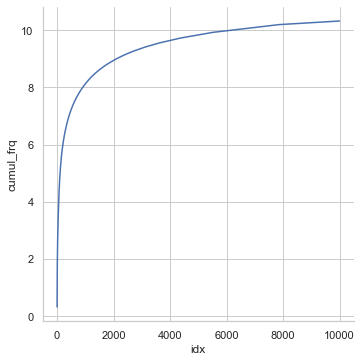

In [3]:
#Using the teachers code from lecture 2 to plot zipf's law in the plots below with minor modifications
#taken from https://learnit.itu.dk/pluginfile.php/296257/mod_resource/content/1/zipf.py

#Plotting for the hate dataset

#running the tokenizer to get the global variable
not_relevant = custom_tokenizer("../Data/Hate/train_text.txt")
frq = pd.DataFrame(based.most_common(), columns=['token', 'frequency'])
# Index in the sorted list
frq['idx'] = frq.index + 1

# Frequency normalised by corpus size
frq['norm_freq'] = frq.frequency / len(based)

# Cumulative normalised frequency
frq['cumul_frq'] = frq.norm_freq.cumsum()

seaborn.set_theme(style='whitegrid')

# Plot: Cumulative frequency by index, top 10000 tokens
seaborn.relplot(x='idx', y='cumul_frq', data=frq[:10000], kind='line')
plt.show()

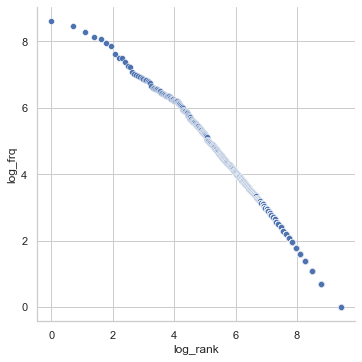

In [4]:
# Plot: Log-log plot for Zipf's law
frq['log_frq'] = numpy.log(frq.frequency)
frq['log_rank'] = numpy.log(frq.frequency.rank(ascending=False))
seaborn.relplot(x='log_rank', y='log_frq', data=frq)
plt.show()

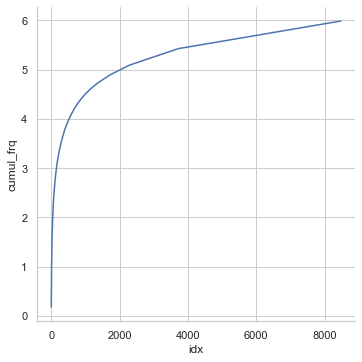

In [5]:
#Plotting for the emotion dataset
#running the tokenizer to get the global variable "based"
not_relevant = custom_tokenizer("../Data/Emotion/train_text.txt")
frq = pd.DataFrame(based.most_common(), columns=['token', 'frequency'])

# Index in the sorted list
frq['idx'] = frq.index + 1

# Frequency normalised by corpus size
frq['norm_freq'] = frq.frequency / len(based)

# Cumulative normalised frequency
frq['cumul_frq'] = frq.norm_freq.cumsum()

# Plot: Cumulative frequency by index, top 10000 tokens
seaborn.relplot(x='idx', y='cumul_frq', data=frq, kind='line')
plt.show()

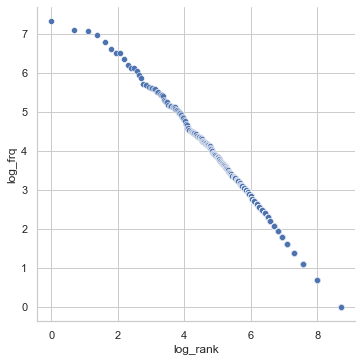

In [6]:
# Plot: Log-log plot for Zipf's law
frq['log_frq'] = numpy.log(frq.frequency)
frq['log_rank'] = numpy.log(frq.frequency.rank(ascending=False))
seaborn.relplot(x='log_rank', y='log_frq', data=frq)
plt.show()

### Manual Annotation and Inter-Annotation Agreement

In [7]:
#Cohen's Kappa

def kappa(h):
    h2 = open("../Data/Hate/train_labels.txt", "r").readlines()[:100]
    index = 0
    errors = 0
    a = 0
    b = 0
    c = 0
    d = 0
    print("--- hate ---")
    print("(0:non-hate, 1:hate)")
    for hm, testhm in zip(h,h2):
        index += 1
        if hm[0] != testhm[0]:
            errors += 1
            print("line:", index, "  error:", hm[0], ":", testhm[0])
        if hm[0] == '1':
            if testhm[0] == '1':
                a += 1
            elif testhm[0] == '0':
                b += 1
        elif hm[0] == '0':
            if testhm[0] == '1':
                c += 1
            elif testhm[0] == '0':
                d += 1
    p0 = (a+d)/(a+b+c+d)
    pyes = ((a+b)/(a+b+c+d))*((a+b)/(a+b+c+d))
    pno = ((c+d)/(a+b+c+d))*((b+d)/(a+b+c+d))
    pe = (pyes + pno)
    print("---")
    print("p0: ", p0) #percentage correct
    print("pyes: ", pyes) #probability that both were randomly labeled as hate
    print("pno: ", pno) #probability both were randomly labeled as non-hate
    print("pe: ", pe) #overall random agreement probability 
    print("Agreement: ", ((p0 - pe)/(1-pe))) #inter-rater reliability
    return p0,pe

h1 = open("../Data/Hate/Christian_train_labels.txt", "r").readlines()
h2 = open("../Data/Hate/Cosmin_train_labels.txt", "r").readlines()
h3 = open("../Data/Hate/Daniel_train_labels.txt", "r").readlines()
h4 = open("../Data/Hate/Jacob_train_labels.txt", "r").readlines()

print("Christian's")
p0_1,pe_1 = kappa(h1)
print("---------------------")
print("Cosmin's")
p0_2,pe_2 = kappa(h2)
print("---------------------")
print("Daniel's")
p0_3,pe_3 = kappa(h3)
print("---------------------")
print("Jacob's")
p0_4,pe_4 = kappa(h4)

#calculating the average
p0_average = (p0_1+p0_2+p0_3+p0_4)/4
pe_average = (pe_1+pe_2+pe_3+pe_4)/4

print("---------------------")
print("Average score")
print("p0: ", p0_average)
print("pe: ", pe_average)
print("Agreement: ",((p0_average - pe_average)/(1-pe_average)))

Christian's
--- hate ---
(0:non-hate, 1:hate)
line: 1   error: 1 : 0
line: 2   error: 0 : 1
line: 5   error: 1 : 0
line: 7   error: 1 : 0
line: 20   error: 0 : 1
line: 24   error: 1 : 0
line: 27   error: 1 : 0
line: 38   error: 1 : 0
line: 39   error: 1 : 0
line: 40   error: 1 : 0
line: 45   error: 1 : 0
line: 46   error: 0 : 1
line: 49   error: 0 : 1
line: 54   error: 0 : 1
line: 56   error: 1 : 0
line: 61   error: 1 : 0
line: 69   error: 1 : 0
line: 71   error: 1 : 0
line: 72   error: 1 : 0
line: 76   error: 1 : 0
line: 77   error: 0 : 1
line: 87   error: 1 : 0
line: 90   error: 1 : 0
line: 91   error: 0 : 1
line: 93   error: 1 : 0
line: 95   error: 0 : 1
line: 97   error: 1 : 0
line: 99   error: 0 : 1
---
p0:  0.72
pyes:  0.3364
pno:  0.2184
pe:  0.5548
Agreement:  0.3710691823899371
---------------------
Cosmin's
--- hate ---
(0:non-hate, 1:hate)
line: 4   error: 0 : 1
line: 5   error: 1 : 0
line: 9   error: 1 : 0
line: 18   error: 1 : 0
line: 19   error: 0 : 1
line: 25   error: 1 

### Classifier

Hate speech dataset using CountVectorizer

In [8]:
X = custom_tokenizer('../Data/Hate/train_text.txt')
with open("../Data/Hate/train_labels.txt", "r") as fd:
    y_train = fd.read().splitlines()
with open("../Data/Hate/val_labels.txt", "r") as fd:
    y_val = fd.read().splitlines()
tokenizer_val_set = custom_tokenizer("../Data/Hate/val_text.txt")
#Using 932 features for max features since the test set can support just 932 features and the classifier needs the same number of features
#for the training and validation set
CV = CountVectorizer(max_features=932, min_df=5, max_df=0.7,analyzer='word', ngram_range=(1, 3))
x1_train = CV.fit_transform(X)
clf_mlp = MLPClassifier(random_state=1, max_iter=1000).fit(x1_train, y_train)
classifier_rf = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier_sgd = SGDClassifier(alpha=0.00001,loss = "perceptron")
clf_sgd= classifier_sgd.fit(x1_train,y_train)
rf = classifier_rf.fit(x1_train, y_train) 

In [9]:

CV2 = CountVectorizer(max_features=932, min_df=5, max_df=0.7,analyzer='word', ngram_range=(1, 3))
x1_test = CV2.fit_transform(tokenizer_val_set)
y_pred = rf.predict(x1_test)
y_pred1 = clf_sgd.predict(x1_test)
y_pred_mlp= clf_mlp.predict(x1_test)


In [10]:
len(CV2.get_feature_names())

932

In [11]:


print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))
print(accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val,y_pred1))
print(classification_report(y_val,y_pred1))
print(accuracy_score(y_val, y_pred1))
print(confusion_matrix(y_val,y_pred_mlp))
print(classification_report(y_val,y_pred_mlp))
print(accuracy_score(y_val, y_pred_mlp))

[[339 234]
 [222 205]]
              precision    recall  f1-score   support

           0       0.60      0.59      0.60       573
           1       0.47      0.48      0.47       427

    accuracy                           0.54      1000
   macro avg       0.54      0.54      0.54      1000
weighted avg       0.55      0.54      0.54      1000

0.544
[[418 155]
 [281 146]]
              precision    recall  f1-score   support

           0       0.60      0.73      0.66       573
           1       0.49      0.34      0.40       427

    accuracy                           0.56      1000
   macro avg       0.54      0.54      0.53      1000
weighted avg       0.55      0.56      0.55      1000

0.564
[[416 157]
 [276 151]]
              precision    recall  f1-score   support

           0       0.60      0.73      0.66       573
           1       0.49      0.35      0.41       427

    accuracy                           0.57      1000
   macro avg       0.55      0.54      0.53    

In [12]:


# with open("../Data/Hate/train_labels.txt", "r") as fd:
#     y_train = fd.read().splitlines()
tfidfconverter = TfidfVectorizer(max_features=911, min_df=5, max_df=0.7,analyzer = 'word',ngram_range=(1, 2))
X_train = tfidfconverter.fit_transform(X).toarray()

classifier_sgd = SGDClassifier(alpha=0.00001,loss = "perceptron")
classifier_rf = RandomForestClassifier(n_estimators=1000, random_state=0)
clf_mlp = MLPClassifier(random_state=1, max_iter=1000).fit(X_train, y_train)
rf2  = classifier_rf.fit(X_train, y_train)
sgd2 = classifier_sgd.fit(X_train,y_train) 

In [13]:

# tokenizer_words_dict2 = custom_tokenizer("../Data/Hate/val_text.txt")
tfidfconverter2 = TfidfVectorizer(max_features=911, min_df=5, max_df=0.7,analyzer = 'word',ngram_range=(1, 2))
X_test = tfidfconverter2.fit_transform(tokenizer_val_set).toarray()

y_pred2 = rf2.predict(X_test)
y_pred3 = sgd2.predict(X_test)
y_pred_mlp_val = clf_mlp.predict(X_test)

In [14]:
len(tfidfconverter2.get_feature_names())

911

In [15]:
# with open("../Data/Hate/val_labels.txt", "r") as fd:
#     y_test = fd.read().splitlines()
print(confusion_matrix(y_val,y_pred2))
print(classification_report(y_val,y_pred2))
print(accuracy_score(y_val, y_pred2))
print(confusion_matrix(y_val,y_pred3))
print(classification_report(y_val,y_pred3))
print(accuracy_score(y_val, y_pred3))
print(confusion_matrix(y_val,y_pred_mlp_val))
print(classification_report(y_val,y_pred_mlp_val))
print(accuracy_score(y_val, y_pred_mlp_val))

[[324 249]
 [247 180]]
              precision    recall  f1-score   support

           0       0.57      0.57      0.57       573
           1       0.42      0.42      0.42       427

    accuracy                           0.50      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.50      0.50      0.50      1000

0.504
[[139 434]
 [106 321]]
              precision    recall  f1-score   support

           0       0.57      0.24      0.34       573
           1       0.43      0.75      0.54       427

    accuracy                           0.46      1000
   macro avg       0.50      0.50      0.44      1000
weighted avg       0.51      0.46      0.43      1000

0.46
[[295 278]
 [227 200]]
              precision    recall  f1-score   support

           0       0.57      0.51      0.54       573
           1       0.42      0.47      0.44       427

    accuracy                           0.49      1000
   macro avg       0.49      0.49      0.49     

Emotion dataset,Count Vectorizer,validation test

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

with open("../Data/Emotion/train_labels.txt", "r") as fd:
    y_train_emotion = fd.read().splitlines()
X_emotion = custom_tokenizer("../Data/Emotion/train_text.txt")
tokenizer_emotion_val_set = custom_tokenizer("../Data/Emotion/val_text.txt")
with open("../Data/Emotion/val_labels.txt", "r") as fd:
    y_val_emotion = fd.read().splitlines()

CV = CountVectorizer(max_features=405, min_df=3, max_df=0.8,analyzer='word', ngram_range=(1, 3))
x1_train_emotion = CV.fit_transform(X_emotion)

clf_mlp = MLPClassifier(random_state=1, max_iter=1000).fit(x1_train_emotion, y_train_emotion)
classifier_rf = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier_sgd = SGDClassifier(alpha=0.00001,loss = "log")
clf_sgd= classifier_sgd.fit(x1_train_emotion,y_train_emotion)
rf = classifier_rf.fit(x1_train_emotion, y_train_emotion) 

In [17]:

CV2 = CountVectorizer(max_features=405, min_df=3, max_df=0.8,analyzer='word', ngram_range=(1, 3))
x1_test = CV2.fit_transform(tokenizer_emotion_val_set)
y_pred = rf.predict(x1_test)
y_pred1 = clf_sgd.predict(x1_test)
y_pred_mlpx= clf_mlp.predict(x1_test)

In [18]:
len(CV2.get_feature_names())

405

In [19]:


print(confusion_matrix( y_val_emotion,y_pred))
print(classification_report( y_val_emotion,y_pred))
print(accuracy_score( y_val_emotion, y_pred))
print(confusion_matrix( y_val_emotion,y_pred1))
print(classification_report( y_val_emotion,y_pred1))
print(accuracy_score( y_val_emotion, y_pred1))
print(confusion_matrix( y_val_emotion,y_pred_mlpx))
print(classification_report( y_val_emotion,y_pred_mlpx))
print(accuracy_score( y_val_emotion, y_pred_mlpx))

[[93 24 10 33]
 [43 22  6 26]
 [17  6  0  5]
 [52 18  3 16]]
              precision    recall  f1-score   support

           0       0.45      0.58      0.51       160
           1       0.31      0.23      0.26        97
           2       0.00      0.00      0.00        28
           3       0.20      0.18      0.19        89

    accuracy                           0.35       374
   macro avg       0.24      0.25      0.24       374
weighted avg       0.32      0.35      0.33       374

0.3502673796791444
[[84 11 20 45]
 [43 13  9 32]
 [13  3  1 11]
 [46 14 11 18]]
              precision    recall  f1-score   support

           0       0.45      0.53      0.49       160
           1       0.32      0.13      0.19        97
           2       0.02      0.04      0.03        28
           3       0.17      0.20      0.18        89

    accuracy                           0.31       374
   macro avg       0.24      0.22      0.22       374
weighted avg       0.32      0.31      0.30 

In [20]:

tfidfconverter = TfidfVectorizer(max_features=405, min_df=3, max_df=0.8,analyzer = 'word',ngram_range=(1, 3))
X_train_emotion = tfidfconverter.fit_transform(X_emotion).toarray()

classifier_sgd = SGDClassifier(alpha=0.00001,loss = "perceptron")
classifier_rf = RandomForestClassifier(n_estimators=1000, random_state=0,criterion="entropy")
clf_mlp = MLPClassifier(random_state=1, max_iter=1000).fit(X_train_emotion, y_train_emotion)
rf2  = classifier_rf.fit(X_train_emotion, y_train_emotion)
sgd2 = classifier_sgd.fit(X_train_emotion,y_train_emotion) 

In [21]:

tfidfconverter2 = TfidfVectorizer(max_features=405, min_df=3, max_df=0.8,analyzer = 'word',ngram_range=(1, 3))
X_test = tfidfconverter2.fit_transform(tokenizer_emotion_val_set).toarray()

y_pred2 = rf2.predict(X_test)
y_pred3 = sgd2.predict(X_test)
y_pred4 = clf_mlp.predict(X_test)

In [22]:
len(tfidfconverter2.get_feature_names())

405

In [23]:

print(confusion_matrix(y_val_emotion,y_pred2))
print(classification_report(y_val_emotion,y_pred2))
print(accuracy_score(y_val_emotion, y_pred2))
print(confusion_matrix(y_val_emotion,y_pred3))
print(classification_report(y_val_emotion,y_pred3))
print(accuracy_score(y_val_emotion, y_pred3))
print(confusion_matrix(y_val_emotion,y_pred4))
print(classification_report(y_val_emotion,y_pred4))
print(accuracy_score(y_val_emotion, y_pred4))

[[87 26 11 36]
 [46 18  6 27]
 [16  7  0  5]
 [49 21  3 16]]
              precision    recall  f1-score   support

           0       0.44      0.54      0.49       160
           1       0.25      0.19      0.21        97
           2       0.00      0.00      0.00        28
           3       0.19      0.18      0.18        89

    accuracy                           0.32       374
   macro avg       0.22      0.23      0.22       374
weighted avg       0.30      0.32      0.31       374

0.3235294117647059
[[86 18 12 44]
 [34 19  3 41]
 [11  7  1  9]
 [40 20  4 25]]
              precision    recall  f1-score   support

           0       0.50      0.54      0.52       160
           1       0.30      0.20      0.24        97
           2       0.05      0.04      0.04        28
           3       0.21      0.28      0.24        89

    accuracy                           0.35       374
   macro avg       0.26      0.26      0.26       374
weighted avg       0.35      0.35      0.34 

Test set

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier


with open("../Data/Hate/train_labels.txt", "r") as fd:
    y_train = fd.read().splitlines()
tokenizer_test_set_hate = custom_tokenizer("../Data/Hate/test_text.txt")
with open("../Data/Hate/test_labels.txt", "r") as fd:
    y_test = fd.read().splitlines()

CV = CountVectorizer(max_features=2500, min_df=5, max_df=0.7,analyzer='word', ngram_range=(1, 2))
x1_train = CV.fit_transform(X)
print(x1_train)
clf_mlp = MLPClassifier(random_state=1, max_iter=1000).fit(x1_train, y_train)
classifier_rf = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier_sgd = SGDClassifier(alpha=0.0001,loss = "log")
clf_sgd= classifier_sgd.fit(x1_train,y_train)
rf = classifier_rf.fit(x1_train, y_train) 

  (0, 1354)	1
  (0, 1349)	1
  (0, 175)	1
  (0, 2435)	2
  (0, 1372)	1
  (0, 455)	1
  (0, 352)	1
  (0, 933)	1
  (0, 1439)	1
  (0, 190)	1
  (0, 2466)	1
  (0, 1449)	1
  (1, 2435)	2
  (1, 2383)	1
  (1, 2339)	1
  (1, 756)	1
  (1, 2074)	1
  (1, 1699)	1
  (1, 2433)	1
  (1, 540)	1
  (1, 1784)	1
  (1, 1035)	1
  (1, 1119)	1
  (1, 888)	1
  (1, 1910)	1
  :	:
  (8998, 1533)	1
  (8998, 106)	1
  (8998, 2192)	1
  (8999, 2435)	1
  (8999, 1372)	1
  (8999, 2466)	1
  (8999, 2485)	1
  (8999, 992)	1
  (8999, 289)	1
  (8999, 1929)	1
  (8999, 2352)	1
  (8999, 1331)	1
  (8999, 788)	2
  (8999, 277)	1
  (8999, 759)	1
  (8999, 1712)	1
  (8999, 1801)	1
  (8999, 2358)	1
  (8999, 245)	1
  (8999, 1012)	1
  (8999, 1932)	1
  (8999, 1518)	1
  (8999, 446)	1
  (8999, 300)	1
  (8999, 882)	1


In [25]:


CV2 = CountVectorizer(max_features=2500, min_df=5, max_df=0.7,analyzer='word', ngram_range=(1, 2))
x1_test = CV2.fit_transform(tokenizer_test_set_hate)
y_pred = rf.predict(x1_test)
y_pred1 = clf_sgd.predict(x1_test)
y_pred_mlp= clf_mlp.predict(x1_test)


In [26]:

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test,y_pred_mlp))
print(classification_report(y_test,y_pred_mlp))
print(accuracy_score(y_test, y_pred_mlp))

[[935 783]
 [595 657]]
              precision    recall  f1-score   support

           0       0.61      0.54      0.58      1718
           1       0.46      0.52      0.49      1252

    accuracy                           0.54      2970
   macro avg       0.53      0.53      0.53      2970
weighted avg       0.55      0.54      0.54      2970

0.5360269360269361
[[1327  391]
 [ 891  361]]
              precision    recall  f1-score   support

           0       0.60      0.77      0.67      1718
           1       0.48      0.29      0.36      1252

    accuracy                           0.57      2970
   macro avg       0.54      0.53      0.52      2970
weighted avg       0.55      0.57      0.54      2970

0.5683501683501684
[[1151  567]
 [ 770  482]]
              precision    recall  f1-score   support

           0       0.60      0.67      0.63      1718
           1       0.46      0.38      0.42      1252

    accuracy                           0.55      2970
   macro avg 

In [27]:

tfidfconverter = TfidfVectorizer(max_features=2541, min_df=5, max_df=0.7,analyzer = 'word',ngram_range=(1, 2))
X_train = tfidfconverter.fit_transform(X).toarray()

classifier_sgd = SGDClassifier(alpha=0.001,loss = "log")
classifier_rf = RandomForestClassifier(n_estimators=1000, random_state=0)
clf_mlp = MLPClassifier(random_state=1, max_iter=1000).fit(X_train, y_train)
rf2  = classifier_rf.fit(X_train, y_train)
sgd2 = classifier_sgd.fit(X_train,y_train) 

In [28]:

tokenizer_words_dict2 = custom_tokenizer("../Data/Hate/test_text.txt")
tfidfconverter2 = TfidfVectorizer(max_features=2541,min_df=5, max_df=0.7,analyzer = 'word',ngram_range=(1, 2))
X_test = tfidfconverter2.fit_transform(tokenizer_words_dict2).toarray()

y_pred2 = rf2.predict(X_test)
y_pred3 = sgd2.predict(X_test)
y_pred_mlp = clf_mlp.predict(X_test)

In [29]:
len(tfidfconverter2.get_feature_names())

2541

In [30]:
with open("../Data/Hate/test_labels.txt", "r") as fd:
    y_test = fd.read().splitlines()
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test,y_pred_mlp))
print(classification_report(y_test,y_pred_mlp))
print(accuracy_score(y_test, y_pred_mlp))

[[1377  341]
 [ 931  321]]
              precision    recall  f1-score   support

           0       0.60      0.80      0.68      1718
           1       0.48      0.26      0.34      1252

    accuracy                           0.57      2970
   macro avg       0.54      0.53      0.51      2970
weighted avg       0.55      0.57      0.54      2970

0.5717171717171717
[[1651   67]
 [1173   79]]
              precision    recall  f1-score   support

           0       0.58      0.96      0.73      1718
           1       0.54      0.06      0.11      1252

    accuracy                           0.58      2970
   macro avg       0.56      0.51      0.42      2970
weighted avg       0.57      0.58      0.47      2970

0.5824915824915825
[[935 783]
 [679 573]]
              precision    recall  f1-score   support

           0       0.58      0.54      0.56      1718
           1       0.42      0.46      0.44      1252

    accuracy                           0.51      2970
   macro avg 

In [31]:
tokenizer_emotion_test_set = custom_tokenizer("../Data/Emotion/test_text.txt")
with open("../Data/Emotion/test_labels.txt", "r") as fd:
    y_test_emotion = fd.read().splitlines()

CV = CountVectorizer(max_features=1657, min_df=3, max_df=0.8,analyzer='word', ngram_range=(1, 4))
x1_train = CV.fit_transform(X_emotion)
clf_mlp = MLPClassifier(random_state=1, max_iter=1000).fit(x1_train, y_train_emotion)
classifier_rf = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier_sgd = SGDClassifier(alpha=0.00001,loss = "perceptron")
clf_sgd= classifier_sgd.fit(x1_train,y_train_emotion)
rf = classifier_rf.fit(x1_train, y_train_emotion) 

In [32]:

CV2 = CountVectorizer(max_features=1657, min_df=3, max_df=0.8,analyzer='word', ngram_range=(1, 4))
x1_test = CV2.fit_transform(tokenizer_emotion_test_set)
y_pred = rf.predict(x1_test)
y_pred1 = clf_sgd.predict(x1_test)
y_pred_mlp2= clf_mlp.predict(x1_test)

In [33]:
len(CV2.get_feature_names())

1657

In [34]:

print(confusion_matrix(y_test_emotion,y_pred))
print(classification_report(y_test_emotion,y_pred))
print(accuracy_score(y_test_emotion, y_pred))
print(confusion_matrix(y_test_emotion,y_pred1))
print(classification_report(y_test_emotion,y_pred1))
print(accuracy_score(y_test_emotion, y_pred1))
print(confusion_matrix(y_test_emotion,y_pred1))
print(classification_report(y_test_emotion,y_pred_mlp2))
print(accuracy_score(y_test_emotion,y_pred_mlp2))

[[130 172   4 252]
 [ 61 134   3 160]
 [ 24  44   9  46]
 [ 67 114   4 197]]
              precision    recall  f1-score   support

           0       0.46      0.23      0.31       558
           1       0.29      0.37      0.33       358
           2       0.45      0.07      0.13       123
           3       0.30      0.52      0.38       382

    accuracy                           0.33      1421
   macro avg       0.38      0.30      0.29      1421
weighted avg       0.37      0.33      0.32      1421

0.330752990851513
[[203 186  32 137]
 [117 152   4  85]
 [ 30  35  12  46]
 [126 111  18 127]]
              precision    recall  f1-score   support

           0       0.43      0.36      0.39       558
           1       0.31      0.42      0.36       358
           2       0.18      0.10      0.13       123
           3       0.32      0.33      0.33       382

    accuracy                           0.35      1421
   macro avg       0.31      0.30      0.30      1421
weighted avg 

Emotion dataset,test set 

In [35]:



tfidfconverter = TfidfVectorizer(max_features=1657,min_df=5, max_df=0.8,analyzer = 'word',ngram_range=(1, 3))
X_train = tfidfconverter.fit_transform(X_emotion).toarray()

classifier_sgd = SGDClassifier(alpha=0.00001,loss = "perceptron")
classifier_rf = RandomForestClassifier(n_estimators=1000, random_state=0,criterion="entropy")
clf_mlp = MLPClassifier(random_state=1, max_iter=1000).fit(X_train, y_train_emotion)
rf2  = classifier_rf.fit(X_train, y_train_emotion)
sgd2 = classifier_sgd.fit(X_train,y_train_emotion) 

In [36]:

tfidfconverter2 = TfidfVectorizer(max_features=1657,min_df=3, max_df=0.8,analyzer = 'word',ngram_range=(1, 4))
X_test = tfidfconverter2.fit_transform(tokenizer_emotion_test_set).toarray()

y_pred2 = rf2.predict(X_test)
y_pred3 = sgd2.predict(X_test)
y_pred4 = clf_mlp.predict(X_test)

In [37]:
len(tfidfconverter2.get_feature_names())

1657

In [38]:

print(confusion_matrix(y_test_emotion,y_pred2))
print(classification_report(y_test_emotion,y_pred2))
print(accuracy_score(y_test_emotion, y_pred2))
print(confusion_matrix(y_test_emotion,y_pred3))
print(classification_report(y_test_emotion,y_pred3))
print(accuracy_score(y_test_emotion, y_pred3))
print(confusion_matrix(y_test_emotion,y_pred4))
print(classification_report(y_test_emotion,y_pred4))
print(accuracy_score(y_test_emotion, y_pred4))

[[141  84   7 326]
 [ 80  42   7 229]
 [ 45  10   0  68]
 [ 88  45   9 240]]
              precision    recall  f1-score   support

           0       0.40      0.25      0.31       558
           1       0.23      0.12      0.16       358
           2       0.00      0.00      0.00       123
           3       0.28      0.63      0.39       382

    accuracy                           0.30      1421
   macro avg       0.23      0.25      0.21      1421
weighted avg       0.29      0.30      0.26      1421

0.2976776917663617
[[248 113  72 125]
 [163  69  28  98]
 [ 54  22  12  35]
 [185  72  29  96]]
              precision    recall  f1-score   support

           0       0.38      0.44      0.41       558
           1       0.25      0.19      0.22       358
           2       0.09      0.10      0.09       123
           3       0.27      0.25      0.26       382

    accuracy                           0.30      1421
   macro avg       0.25      0.25      0.25      1421
weighted avg